In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
from data_generator import Datagen
from feedforward_network import FeedForwardNet
from residual_network import ResidualNet
from terminal_unicycle import FeedforwardUnicycle, ResidualUnicycle
from ddp_solver import solve_problem
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl
from utils import plot_trajectories

In [3]:
net1 = torch.load("./Fnet/net1.pth")

net2 = torch.load("./Fnet/net2.pth")

net3 = torch.load("./Fnet/net3.pth")
net4 = torch.load("./Fnet/net4.pth")
net5 = torch.load("./Fnet/net5.pth")
net6 = torch.load("./Fnet/net6.pth")
net7 = torch.load("./Fnet/net7.pth")
net8 = torch.load("./Fnet/net8.pth")
net9 = torch.load("./Fnet/net9.pth")
net10 = torch.load("./Fnet/net10.pth")


Text(0.5, 1.0, '20 Irepa iterations with Feedforward Network.')

<Figure size 432x288 with 0 Axes>

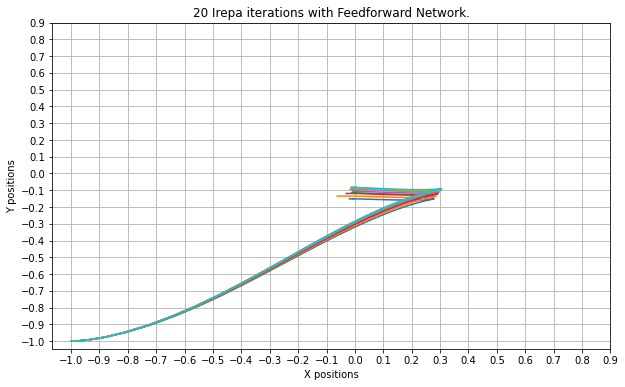

In [5]:
# Plot trajectories from the same point.



plt.clf()
fig, ax = plt.subplots(figsize=(10,6))

neural_nets = [net1, net2, net3, net4, 
              net5,net6, net7, net8,
              net9, net10]




for neural_net in neural_nets:
    position = np.array([-1, -1, 0])
    terminal_model = FeedforwardUnicycle(neural_net)
    ddp = solve_problem(initial_configuration=position,
                       terminal_model=terminal_model,
                       precision=1e-6)
    
    xs_ = np.array(ddp.xs)
    xs  = xs_[:,0:2]

    ax.plot(xs[:,0], xs[:,1])
    
ax.set_xticks(np.arange(-1., 1, step=0.1))
ax.set_yticks(np.arange(-1., 1, step=0.1))
ax.grid()
ax.set_xlabel("X positions")
ax.set_ylabel("Y positions")
ax.set_title("20 Irepa iterations with Feedforward Network.")
#plt.savefig("3.png")

<Figure size 432x288 with 0 Axes>

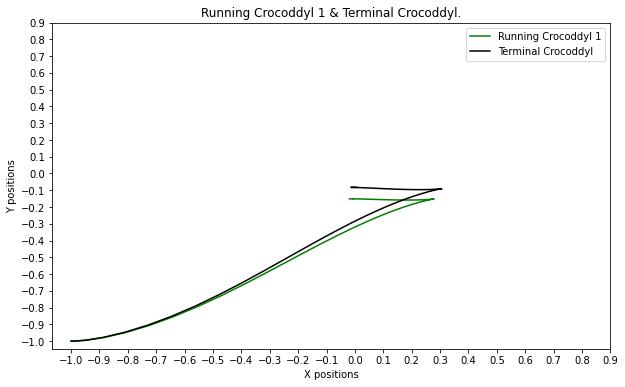

In [7]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,6))

position = np.array([-1, -1, 0.])

terminal_model = FeedforwardUnicycle(net1)
ddp1 = solve_problem(initial_configuration=position,
                   terminal_model=terminal_model,
                   precision=1e-6)

xs_1 = np.array(ddp1.xs)
xs1  = xs_1[:,0:2]

terminal_model2 = FeedforwardUnicycle(net10)
ddp2 = solve_problem(initial_configuration=position,
                   terminal_model=terminal_model2,
                   precision=1e-6)

xs_2 = np.array(ddp2.xs)
xs2  = xs_2[:,0:2]



ax.plot(xs1[:,0], xs1[:,1], c = 'green', label = "Running Crocoddyl 1")
ax.plot(xs2[:,0], xs2[:,1], c = 'black', label = "Terminal Crocoddyl")

    
ax.set_xticks(np.arange(-1, 1, step=0.1))
ax.set_yticks(np.arange(-1, 1, step=0.1))
#ax.grid()
ax.set_xlabel("X positions")
ax.set_ylabel("Y positions")
ax.set_title("Running Crocoddyl 1 & Terminal Crocoddyl.")
ax.legend()

In [8]:
# Value functions

def values_traj(net, dataset):
    values = []
    traj = []
    for data in dataset:
        terminal_model = FeedforwardUnicycle(net)
        ddp = solve_problem(initial_configuration=data,
                           terminal_model=terminal_model)
        values.append(ddp.cost)
        xs_ = np.array(ddp.xs)
        xs = xs_[:,0:2]
        traj.append(xs)
    return values, traj



            

In [ ]:
data_circle = Datagen.circular_data()

v1,t1 = values_traj(net1, data_circle)
v5,t5 = values_traj(net5, data_circle) 
v10,t10 = values_traj(net10, data_circle) 


 Returning 100 points from the circumference of a circle of radii [2]


In [ ]:
plot_trajectories(value=v1, xs=t1, name="Cost", title="Running Crocoddyl 1")


In [ ]:
plot_trajectories(value=v5, xs=t5, name="Cost", title="Running Crocoddyl 5")


In [ ]:
plot_trajectories(value=v10, xs=t10, name="Cost", title="Running Crocoddyl 10")


In [ ]:
data_grid = Datagen.grid_data(size=30, limits=[-1,1])


In [ ]:
def value_data(positions, net):
    terminal_model = FeedforwardUnicycle(net)
    y_data = []
    
    for position in positions:
        ddp = solve_problem(terminal_model = terminal_model,
                            initial_configuration = position,
                            horizon   = 100,
                            precision = 1e-6,
                            maxiters  = 1000,
                            state_weight = 1,
                            control_weight = 1
                           )
            
            
            
        y_data.append(ddp.cost)
            
                
    y_data = np.array(y_data).reshape(-1,1)
    return y_data

In [ ]:
v1 = value_data(data_grid, net1)

In [ ]:
v5 = value_data(data_grid, net5)
v10 = value_data(data_grid, net10)


In [ ]:
plt.clf()

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 10,
        }

# Make the figure:

fig, axs = plt.subplots(2, 2, figsize=(6, 8), sharex=True, sharey ='row')
fig.subplots_adjust(left=0.02, bottom=0.2, right=0.95, top=0.94, wspace=0.25)
fig.suptitle("Values")

im1 = axs[0, 0].scatter(x = data_grid[:,0], y = data_grid[:,1], c = v1)
fig.colorbar(im1, ax=axs[0, 0])

im2 = axs[0, 1].scatter(x = data_grid[:,0], y = data_grid[:,1], c = v5)
fig.colorbar(im2, ax=axs[0, 1])

im3 = axs[1, 0].scatter(x = data_grid[:,0], y = data_grid[:,1], c = v10)
fig.colorbar(im3, ax=axs[1, 0])




axs[2,1].axis('off')



axs[0, 0].set_title("Running Crocoddyl 1", font)
axs[0, 1].set_title("Running Crocoddyl 5", font)

axs[1, 0].set_title("Running Crocoddyl 10", font)
axs[1, 1].set_title("Running Crocoddyl 15", font)
axs[0,0].set_xlim(-1, 1)
axs[0,0].set_ylim(-1, 1)
#plt.savefig("values.png")

In [ ]:
# Plot trajectories from the same point.



plt.clf()
fig, ax = plt.subplots(figsize=(10,6))

neural_nets = [net1, net2, net3, net4, 
              net5,net6, net7, net8,
              net9, net10, net11, net12,
              net13, net14,net15, net16,
              net17, net18, net19, net20]




for neural_net in neural_nets:
    position = np.array([[-1, -1, 0],
                         [-1, 0.5, 0],
                         [-1, -0.5, 0]])
    
    for pos in position:
        
        terminal_model = FeedforwardUnicycle(neural_net)
        ddp = solve_problem(initial_configuration=pos,
                           terminal_model=terminal_model,
                           precision=1e-6)

        xs_ = np.array(ddp.xs)
        xs  = xs_[:,0:2]

        ax.plot(xs[:,0], xs[:,1])
    
ax.set_xticks(np.arange(-1., 1, step=0.1))
ax.set_yticks(np.arange(-1., 1, step=0.1))
ax.grid()
ax.set_xlabel("X positions")
ax.set_ylabel("Y positions")
ax.set_title("Different starting positions. 20 iterations")
#plt.savefig('fig2.png')

In [ ]:
# Plot trajectories from the same point.



plt.clf()
fig, ax = plt.subplots(figsize=(10,6))

nets_s = [net1]
nets_t = [net17, net18, net19, net20]



for net in nets_s:
    position = np.array([-1, -1, 0])
    terminal_model = FeedforwardUnicycle(net)
    ddp = solve_problem(initial_configuration=position,
                       terminal_model=terminal_model,
                       precision=1e-6)

    xs_ = np.array(ddp.xs)
    xs  = xs_[:,0:2]

    ax.plot(xs[:,0], xs[:,1], c='blue', label="Running Crocoddyl 1")
    
    
for net in nets_t:
    position = np.array([-1, -1, 0])
    terminal_model = FeedforwardUnicycle(net)
    ddp = solve_problem(initial_configuration=position,
                       terminal_model=terminal_model,
                       precision=1e-6)

    xs_ = np.array(ddp.xs)
    xs  = xs_[:,0:2]

    ax.plot(xs[:,0], xs[:,1], c='grey', label="Toward terminal crocoddyl")

ax.set_xticks(np.arange(-1., 1, step=0.1))
ax.set_yticks(np.arange(-1., 1, step=0.1))
ax.grid()
ax.legend()
ax.set_xlabel("X positions")
ax.set_ylabel("Y positions")
plt.savefig("fig1.png")

In [ ]:
# Plot trajectories from the same point.



plt.clf()
fig, ax = plt.subplots(figsize=(10,6))



position = np.array([-0.5, -.55, 0])
terminal_model1 = FeedforwardUnicycle(net1)
ddp1 = solve_problem(initial_configuration=position,
                   terminal_model=terminal_model,
                   precision=1e-6)
xs_1 = np.array(ddp1.xs)
xs1  = xs_1[:,0:2]


terminal_model2 = FeedforwardUnicycle(net10)
ddp2 = solve_problem(initial_configuration=position,
                   terminal_model=terminal_model2,
                   precision=1e-6)

xs_2 = np.array(ddp2.xs)
xs2  = xs_2[:,0:2]



terminal_model3 = FeedforwardUnicycle(net20)
ddp3 = solve_problem(initial_configuration=position,
                   terminal_model=terminal_model3,
                   precision=1e-6)

xs_3 = np.array(ddp3.xs)
xs3  = xs_3[:,0:2]



ax.plot(xs1[:,0], xs1[:,1], c='red', label="Running Crocoddyl 1")
ax.plot(xs2[:,0], xs2[:,1], c='green', label="Running Crocoddyl 10")
ax.plot(xs3[:,0], xs3[:,1], c='blue', label="Terminal Crocoddyl")


ax.set_xticks(np.arange(-0.5, .5, step=0.1))
ax.set_yticks(np.arange(-.5, .5, step=0.1))
ax.legend()
ax.set_xlabel("X positions")
ax.set_ylabel("Y positions")
